# Week 6<br>Web Scraping

Oct 13, 2021

## Housekeeping

- Homework #3 (required) due on Monday (10/18)
- Homework #4 (optional) assigned 10/18, due in two weeks
- You must complete one of homeworks #4, #5, and #6
- Final project due at the end of the finals period...more details coming soon

## Week 6 agenda: web scraping

**Last time:**
- Why web scraping? 
- Getting familiar with the Web
- Web scraping: extracting data from static sites

**Today:**
- Practice with web scraping
- How to deal with dynamic content

In [1]:
# Start with the usual imports
# We'll use these throughout
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Let's explore [All Sides](https://www.allsides.com/media-bias/media-bias-ratings)

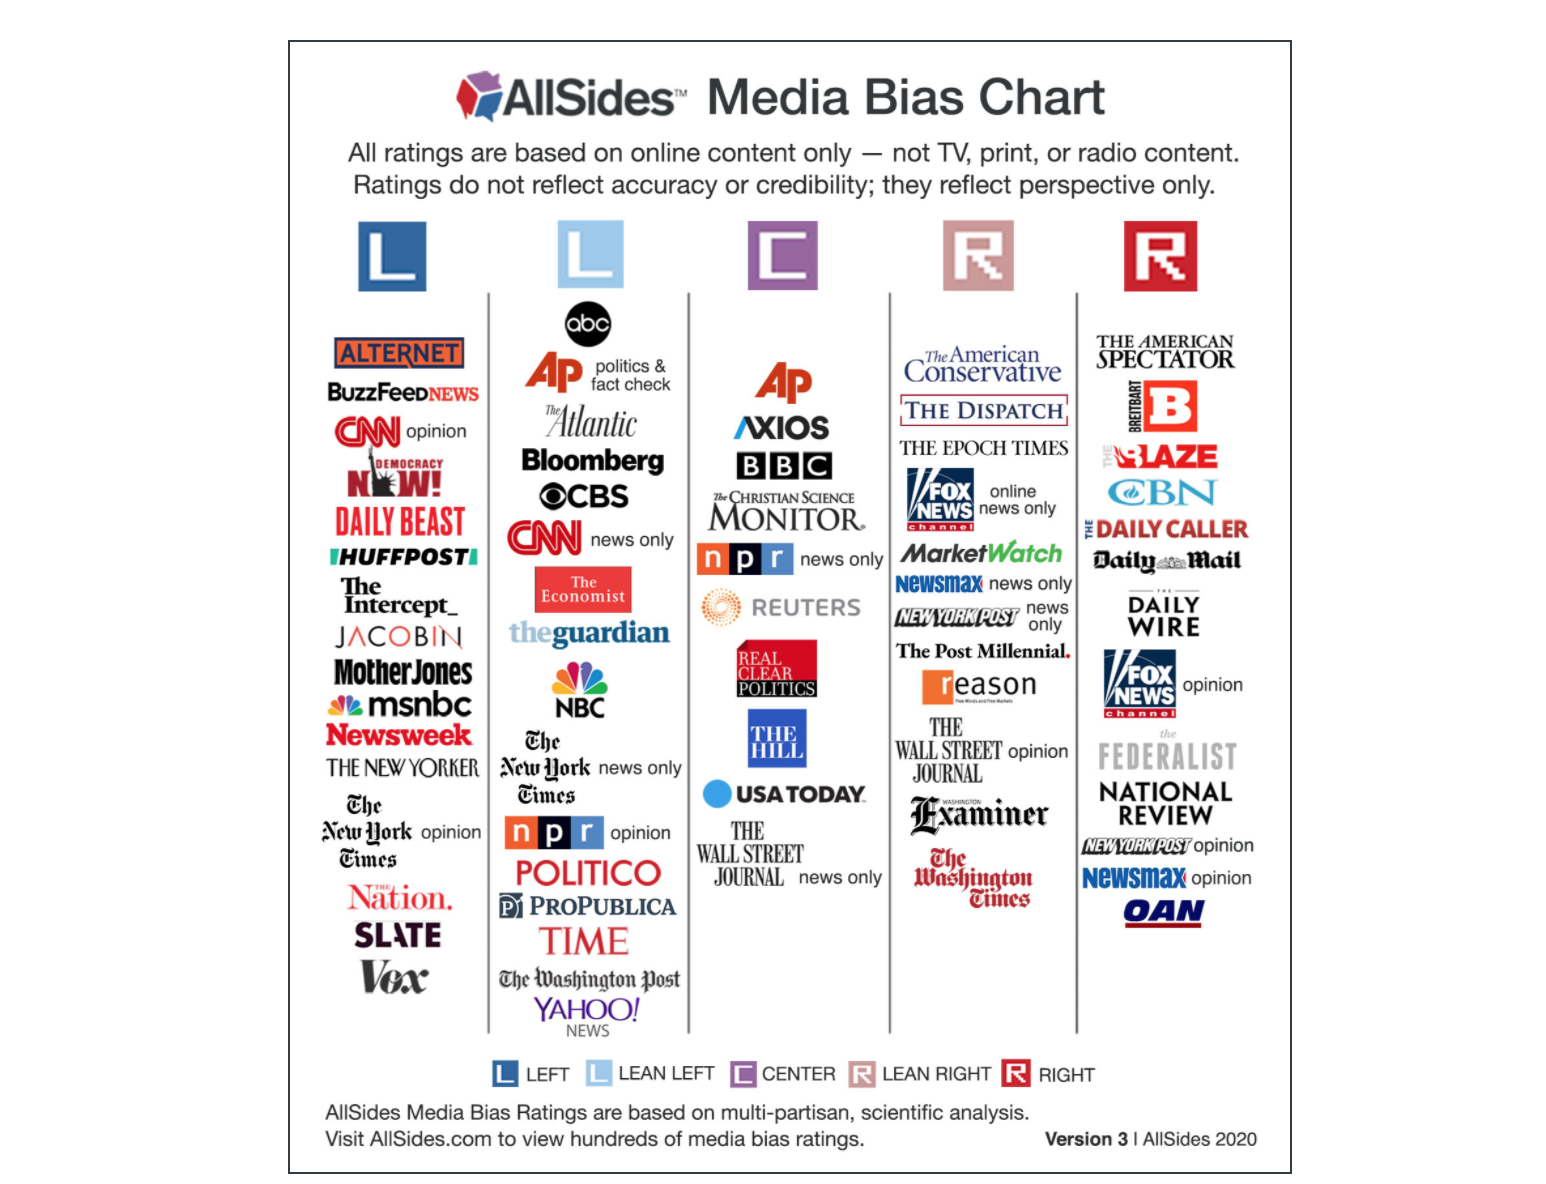

## Getting the HTML content

In [2]:
import requests

In [3]:
url = 'https://www.allsides.com/media-bias/media-bias-ratings'
r = requests.get(url)
print(r.content)

b'<!DOCTYPE html>\n<html  lang="en" dir="ltr" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n<meta charset="utf-8" />\n<link rel="shortcut icon" href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" type="image/png" />\n<meta property="fb:app_id" content="555035668344688" />\n<meta name="description" content="What\xe2\x80\x99s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." />\n<meta name="keywords" content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" />\n<link rel="canonical" href="https://www.allsides.com/m

## BeautifulSoup makes this much more manageable

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(r.content, 'html.parser')

## Making the HTML "pretty"

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <link href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" rel="shortcut icon" type="image/png"/>
  <meta content="555035668344688" property="fb:app_id"/>
  <meta content="What’s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." name="description"/>
  <meta content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" name="keywords"/>
  <link href="https://www.allsides.com/media-bias/media-bias-ratings" 

This is what you'll see if you use the Web Inspector

## How to extract the content we want?

**Two important functions**

1. `soup.select_one(selector)`: finds the first element matching the selector query and returns **one** element
1. `soup.select(selector)`: finds **all** elements matching the selector 

**Recommended reading:** Note on beautiful soup and css selectors in [this week's repository](https://github.com/MUSA-550-Fall-2021/week-6/blob/master/css-selectors.md)

## To the Web Inspector!

We need to select all `<tr>` tags inside the `<tbody>` tag. 

## Let's select the first `<tr>` tag

Web browsers will let us copy the CSS selector for individual elements.

Use: **Right Click > Copy > Copy Selector**

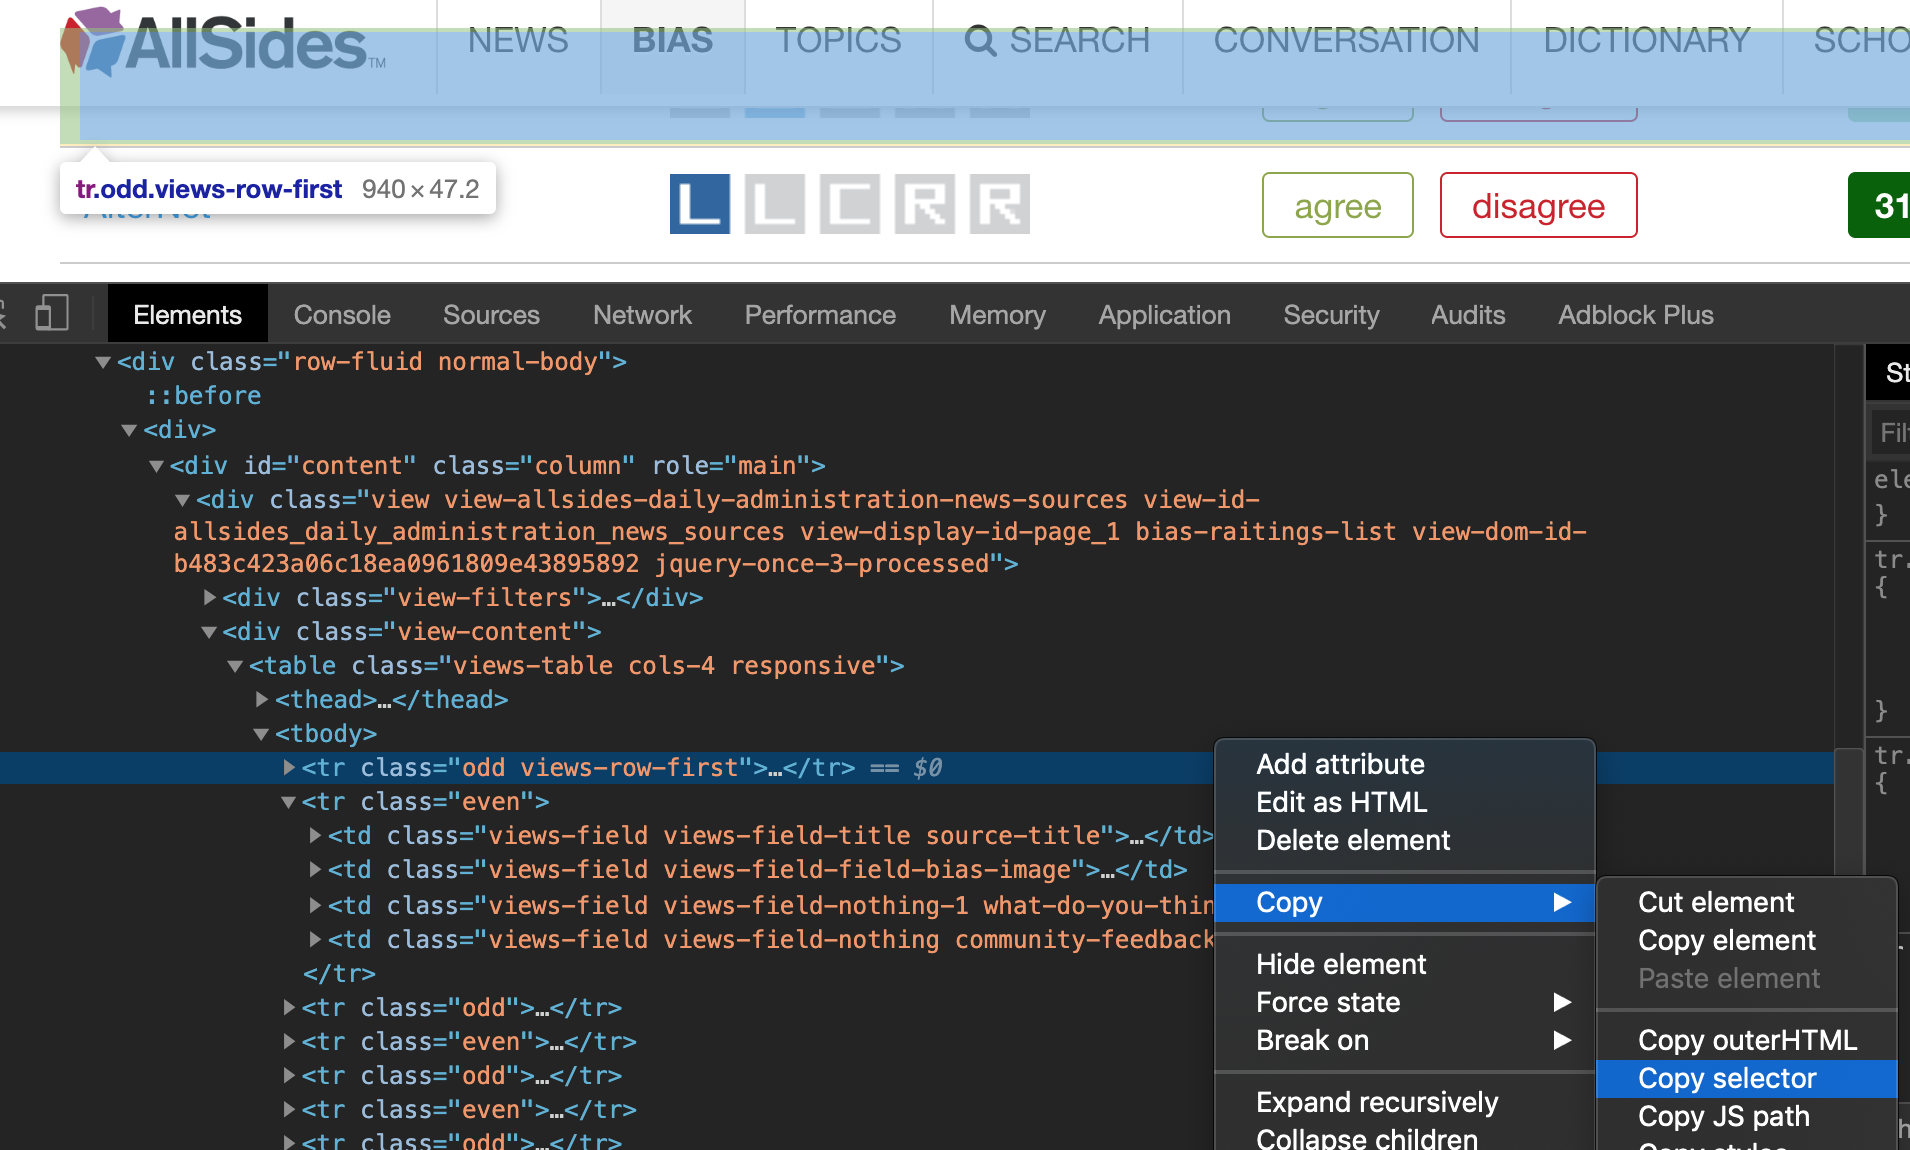

In [7]:
# Select the first row
selector = "#content > div > div.view-content > table > tbody > tr.odd.views-row-first"
first_row = soup.select(selector)

In [8]:
len(first_row)

1

In [9]:
first_row[0]

<tr class="odd views-row-first">
<td class="views-field views-field-title source-title">
<a href="/news-source/abc-news-media-bias">ABC News (Online)</a> </td>
<td class="views-field views-field-field-bias-image">
<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="24" src="https://www.allsides.com/sites/default/files/styles/bias144x24/public/bias-leaning-left.png?itok=mtG3ToEN" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="144"/></a> </td>
<td class="views-field views-field-nothing-1 what-do-you-think">
<div class="agree-disagree-widget"><div class="rate-widget-4 rate-widget clear-block rate-average rate-widget-yesno rate-f13adc4a6caee57d894f9d7ef192d7f3 rate-node-76-4-1" id="rate-node-76-4-1">
<div class="item-list"><ul><li class="first"><a class="rate-button rate-btn" href="/media-bias/media-bias-ratings?rate=zmyDLixxBj_ytZsb_p9D32b0gPWtDEaeOSu_YIdkTIc" id="rate-button-3" rel="nofollow" title="agree">agree</a></li>
<l

## But we need all of the rows!

Generalize the selector to just select all `<tr>` tags within the `<tbody>` tag

In [10]:
# Get all tr tags within the tbody tag
rows = soup.select('tbody tr')

In [11]:
len(rows)

50

In [12]:
# get the first row
row = rows[0]
print(row)

<tr class="odd views-row-first">
<td class="views-field views-field-title source-title">
<a href="/news-source/abc-news-media-bias">ABC News (Online)</a> </td>
<td class="views-field views-field-field-bias-image">
<a href="/media-bias/left-center"><img alt="AllSides Media Bias Rating: Lean Left" height="24" src="https://www.allsides.com/sites/default/files/styles/bias144x24/public/bias-leaning-left.png?itok=mtG3ToEN" title="AllSides Media Bias Rating: Lean Left" typeof="foaf:Image" width="144"/></a> </td>
<td class="views-field views-field-nothing-1 what-do-you-think">
<div class="agree-disagree-widget"><div class="rate-widget-4 rate-widget clear-block rate-average rate-widget-yesno rate-f13adc4a6caee57d894f9d7ef192d7f3 rate-node-76-4-1" id="rate-node-76-4-1">
<div class="item-list"><ul><li class="first"><a class="rate-button rate-btn" href="/media-bias/media-bias-ratings?rate=zmyDLixxBj_ytZsb_p9D32b0gPWtDEaeOSu_YIdkTIc" id="rate-button-3" rel="nofollow" title="agree">agree</a></li>
<l

## Extracting the outlet name

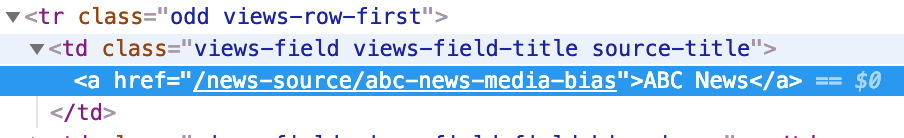

In [13]:
# get the text from the "a" tag inside the ".source-title" class
name = row.select_one('.views-field.views-field-title.source-title a').text
print(name)

ABC News (Online)


In [14]:
# could also select only using the "source-title" class
row.select_one('.source-title a').text

'ABC News (Online)'

## Extracting the outlet bias 

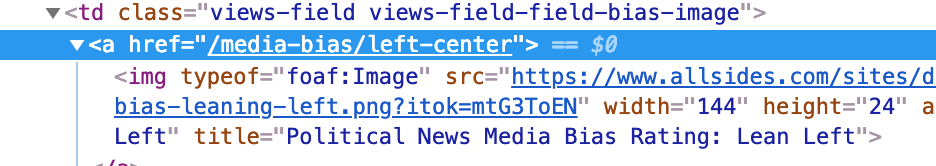

In [15]:
row.select_one('.views-field-field-bias-image a')['href']

'/media-bias/left-center'

In [16]:
# select tag with class "views-field-field-bias-image"
# and then get the "href" attribute of the a element

bias = row.select_one('.views-field-field-bias-image a')['href']
print(bias)
bias = bias.split('/')[-1]
print(bias)

/media-bias/left-center
left-center


## Putting it all together

1. Loop over all rows and make a DataFrame of name and bias
1. Use seaborn to make a bar plot of the number of outlets for each bias type

In [17]:
def get_bias(row):
    """Given a row <tr> element, return the bias value."""
    bias = row.select_one('.views-field-field-bias-image a')['href']
    return bias.split('/')[-1]

def get_name(row):
    """Given a row <tr> element, return the outlet name."""
    return row.select_one('.source-title a').text

In [18]:
# Store all bias/name values
names = []
biases = []

# Select all <tr> elements in the <tbody>
rows = soup.select('tbody tr')

# Loop over all rows
for this_row in rows:
    
    # Get the outlet name for this row
    this_name = get_name(this_row)
    
    # Get the bias value for this row
    this_bias = get_bias(this_row)
    
    # Save the values to a list
    names.append(this_name)
    biases.append(this_bias)

In [19]:
names

['ABC News (Online)',
 'AlterNet',
 'Associated Press',
 'Axios',
 'BBC News',
 'Bloomberg',
 'Breitbart News',
 'BuzzFeed News',
 'CBS News (Online)',
 'Christian Science Monitor',
 'CNN (Online News)',
 'CNN (Opinion)',
 'Daily Beast',
 'Daily Mail',
 'Democracy Now',
 'Forbes',
 'Fox News (Online News)',
 'Fox News (Opinion)',
 'HuffPost',
 'Mother Jones',
 'MSNBC',
 'National Review',
 'NBC News (Online)',
 'New York Post (News)',
 'New York Times (News)',
 'New York Times (Opinion)',
 'Newsweek',
 'NPR (Online News)',
 'NPR (Opinion) ',
 'Politico',
 'Reason',
 'Reuters',
 'Slate',
 'The American Spectator',
 'The Atlantic',
 'The Daily Caller',
 'The Daily Wire',
 'The Economist',
 'The Epoch Times',
 'The Federalist',
 'The Guardian',
 'The Hill',
 'The Intercept',
 'The New Yorker',
 'TheBlaze.com',
 'Time Magazine',
 'USA TODAY',
 'Vox',
 'Wall Street Journal (News)',
 'Wall Street Journal (Opinion)']

In [20]:
# Convert to a dataframe
data = {'name':names, 'bias':biases}
df = pd.DataFrame(data)

In [21]:
df.head()

name         bias
0  ABC News (Online)  left-center
1           AlterNet         left
2   Associated Press       center
3              Axios       center
4           BBC News       center

## Let's plot the results

In [22]:
# group by bias
N = df.groupby("bias", as_index=False).size()

N

bias  size
0        center    10
1          left    14
2   left-center    12
3         right    10
4  right-center     4

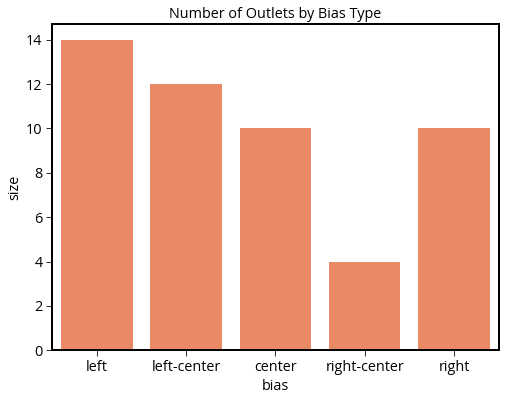

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

# Make a bar plot, ordering the x axis
sns.barplot(
    x=N['bias'],
    y=N['size'],
    color="coral",
    order=["left", "left-center", "center", "right-center", "right"],
    ax=ax
)
ax.set_title("Number of Outlets by Bias Type");

In [24]:
#the right 
df.loc[df['bias'] == 'right']

name   bias
6           Breitbart News  right
13              Daily Mail  right
16  Fox News (Online News)  right
17      Fox News (Opinion)  right
21         National Review  right
33  The American Spectator  right
35        The Daily Caller  right
36          The Daily Wire  right
39          The Federalist  right
44            TheBlaze.com  right

In [25]:
# the left
df.loc[df['bias'] == 'left']

name  bias
1                   AlterNet  left
7              BuzzFeed News  left
10         CNN (Online News)  left
11             CNN (Opinion)  left
12               Daily Beast  left
14             Democracy Now  left
18                  HuffPost  left
19              Mother Jones  left
20                     MSNBC  left
25  New York Times (Opinion)  left
32                     Slate  left
42             The Intercept  left
43            The New Yorker  left
47                       Vox  left

## A few more exercises to practice your skills

Even more: [101 Web Scraping Exercises](https://github.com/stanfordjournalism/search-script-scrape)

For each of the exercises, use the Web Inspector to inspect the structure of the relevant web page, and identify the HTML content you will need to scrape with Python.

### The total number of officer-involved shootings listed by the Philadelphia Police

- Relevant URL: https://www.phillypolice.com/ois/
- **Hint:** select all of the tables on the page, and count the number of rows in each table

### The number of days until the General Election

- Relevant URL: https://www.philadelphiavotes.com/
- **Hint:** select the <span> element that holds the number of days

### The number of potholes filled by the Streets Dept since Jan 1, 2021

Relevant URL: https://www.philadelphiastreets.com/

**Bonus:** calculate the number of potholes filled per day (for calculating the number of days between dates, see [this StackOverflow post](https://stackoverflow.com/questions/151199/how-to-calculate-number-of-days-between-two-given-dates)

### Food inspections in Philadelphia

Extract the following: 
- the names and number of violations per inspection for food-borne risk factors (as a DataFrame)
- the total number of violations

**Note: we are looking for food-borne violations only, and not all restaurants listed will have food-borne violations listed**

Relevant URL: http://data.inquirer.com/inspections/philly/

## What about dynamic content?

How do you scrape data that only appears after user interaction?

## Selenium

<center>
    <img src=attachment:Picture1.png width=700>
</center>
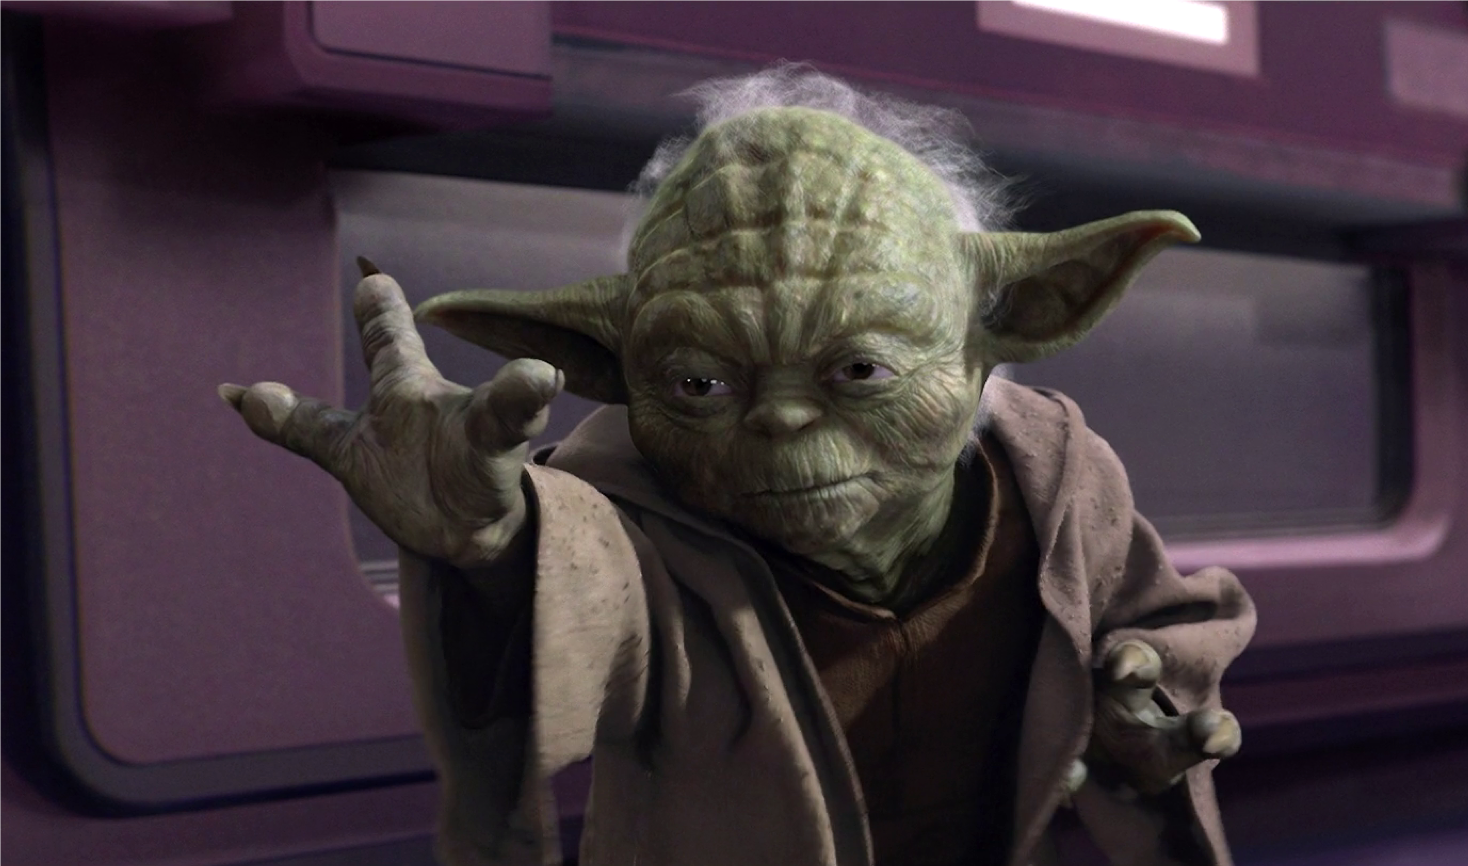

## Note: web browser needed

You'll need a web browser installed to use `selenium`, e.g., FireFox, Google Chrome, Edge, etc.

## Selenium 

- Designed as a framework for testing webpages during development
- Provides an interface to interact with webpages just as a user would 
- Becoming increasingly popular for web scraping dynamic content from pages

## Best by example: Scraping the Philadelphia Municipal Courts portal

- URL: https://ujsportal.pacourts.us/CaseSearch
- Given a Police incident number, we'll see if there is an associated court case with the incident

Selenium will open a web browser, load the page, and the browser will respond to the commands issued by selenium

In [41]:
# Import the webdriver from selenium
from selenium import webdriver

## Initialize the driver

The initialization steps will depend on which browser you want to use!

## Important: Working on Binder

If you are working on Binder, you'll need to use FireFox in "headless" mode, which prevents a browser window from opening.

If you are working locally, it's better to run with the default options — you'll be able to see the browser window open and change as we perform the web scraping.

### Using Google Chrome

In [81]:
# UNCOMMENT BELOW TO USE CHROME

from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [/Users/nhand/.wdm/drivers/chromedriver/mac64/94.0.4606.61/chromedriver] found in cache


### Using Firefox

If you are working on Binder, use the below code!

In [43]:
## UNCOMMENT BELOW IF ON BINDER

# from webdriver_manager.firefox import GeckoDriverManager

# options = webdriver.FirefoxOptions()

# # IF ON BINDER, RUN IN "HEADLESS" MODE (NO BROWSER WINDOW IS OPENED)
# # COMMENT THIS LINE IF WORKING LOCALLY
# options.add_argument("--headless")

# # Initialize
# driver = webdriver.Firefox(executable_path=GeckoDriverManager().install(), options=options)

### Using Microsoft Edge

In [44]:
## UNCOMMENT BELOW TO USE MICROSOFT EDGE

# from webdriver_manager.microsoft import EdgeChromiumDriverManager

# driver = webdriver.Edge(EdgeChromiumDriverManager().install())

## Run the scraping analysis

Strategy:

- Rely on the Web Inspector to identify specific elements of the webpage
- Use Selenium to interact with the webpage
    - Change dropdown elements
    - Click buttons

## 1. Open the URL

In [82]:
# Open the URL
url = "https://ujsportal.pacourts.us/CaseSearch"
driver.get(url)

## 2. Create a dropdown "Select" element

We'll need to: 
- Select the dropdown element on the main page by its ID
- Initialize a `selenium` `Select()` object

In [83]:
# Use the Web Inspector to get the css selector of the dropdown select element
dropdown_selector = "#SearchBy-Control > select"

In [84]:
# Select the dropdown by the element's CSS selector
dropdown = driver.find_element_by_css_selector(dropdown_selector)

In [85]:
from selenium.webdriver.support.ui import Select

# Initialize a Select object
dropdown_select = Select(dropdown)

## 3. Change the selected text in the dropdown

Change the selected element: "Police Incident/Complaint Number" 

In [86]:
# Set the selected text in the dropdown element
dropdown_select.select_by_visible_text("Incident Number")

## 4. Set the incident number 

In [87]:
# Get the input element for the DC number
incident_input_selector = "#IncidentNumber-Control > input"
incident_input = driver.find_element_by_css_selector(incident_input_selector)

In [88]:
# Clear any existing entry
incident_input.clear()

# Input our example incident number
incident_input.send_keys("1725088232")

## 5. Click the search button!

In [89]:
# Submit the search
search_button_id = "btnSearch"
driver.find_element_by_id(search_button_id).click()

## 6. Get the results

- Identify the element holding all of the results
- Within this container, find the `<table>` element and each `<tr>` element within the table

In [90]:
# Select the results container by its ID
results_table_id = "caseSearchResultGrid"
results_table = driver.find_element_by_id(results_container_id)

In [91]:
# Get all of the <tr> rows inside the tbody element 
# NOTE: we using nested selections here!
results_rows = results_table.find_elements_by_css_selector("tbody > tr")

**Example** The number of court cases: 

In [93]:
# Number of court cases
number_of_cases = len(results_rows)
print(f"Number of courts cases: {number_of_cases}")

Number of courts cases: 2


**Example** Extract the text elements from the first row of the results

In [94]:
first_row = results_rows[0]

In [95]:
first_row

<selenium.webdriver.remote.webelement.WebElement (session="eca1e18786510a7cf6f9cf092d5a30ff", element="3551c880-5e76-4adb-ada6-f6e28f9c04ef")>

In [96]:
# Extract out all of the "<td>" cells from the first row
td_cells = first_row.find_elements_by_css_selector("td")

# Loop over each <td> cell
for cell in td_cells:
    
    # Extract out the text from the <td> element
    text = cell.text
    
    # Print out text
    if text != "":
        print(text)

MC-51-CR-0030672-2017
Common Pleas
Comm. v. Velquez, Victor
Closed
10/13/2017
Velquez, Victor
09/05/1974
Philadelphia
MC-01-51-Crim
U0981035
1725088232-0030672
1725088232


## 7. Close the driver!

In [97]:
driver.close()

## That's it!

- Next week: working with "big" data
- See you on Monday!